In [15]:
import pandas as pd 
import numpy as np

In [16]:
data=pd.read_csv("validated_addresses.csv")

In [17]:
import pandas as pd
import random
import numpy as np

# Load your real dataset
real_data = pd.read_csv('validated_addresses.csv')

# Define realistic data parameters
countries = {
    "India": {"code": "IN", "lat_range": (6, 35), "long_range": (68, 97)},
    "Pakistan": {"code": "PK", "lat_range": (23, 37), "long_range": (60, 78)},
    "USA": {"code": "US", "lat_range": (24, 49), "long_range": (-125, -66)},
    "France": {"code": "FR", "lat_range": (41, 51), "long_range": (-5, 9)},
    "Germany": {"code": "DE", "lat_range": (47, 55), "long_range": (5, 15)},
    "UK": {"code": "GB", "lat_range": (49, 59), "long_range": (-8, 2)},
    "Australia": {"code": "AU", "lat_range": (-44, -10), "long_range": (113, 154)}
}

# Common cities for each country (just a small sample for demonstration)
cities = {
    "India": ["Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad"],
    "Pakistan": ["Karachi", "Lahore", "Islamabad", "Rawalpindi", "Faisalabad"],
    "USA": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"],
    "France": ["Paris", "Marseille", "Lyon", "Toulouse", "Nice"],
    "Germany": ["Berlin", "Hamburg", "Munich", "Cologne", "Frankfurt"],
    "UK": ["London", "Manchester", "Birmingham", "Glasgow", "Liverpool"],
    "Australia": ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide"]
}

# States/Regions for each country
states = {
    "India": ["Maharashtra", "Tamil Nadu", "Karnataka", "Uttar Pradesh", "Gujarat"],
    "Pakistan": ["Sindh", "Punjab", "Khyber Pakhtunkhwa", "Balochistan"],
    "USA": ["California", "Texas", "Florida", "New York", "Illinois"],
    "France": ["Île-de-France", "Provence-Alpes-Côte d'Azur", "Occitanie", "Auvergne-Rhône-Alpes"],
    "Germany": ["Bavaria", "North Rhine-Westphalia", "Baden-Württemberg", "Lower Saxony"],
    "UK": ["England", "Scotland", "Wales", "Northern Ireland"],
    "Australia": ["New South Wales", "Victoria", "Queensland", "Western Australia"]
}

columns = [
    "Place Name", "Latitude", "Longitude", "City", "State", "Country", 
    "valid_coords", "detected_country", "detected_country_name", 
    "country_match", "is_valid"
]

# Generate synthetic data
num_synthetic_data = 5000
synthetic_data = []

for _ in range(num_synthetic_data):
    # Select a random country
    country = random.choice(list(countries.keys()))
    country_info = countries[country]
    
    # Determine if this will be a valid or invalid entry
    is_valid = random.random() < 0.3  # 30% chance of being valid
    
    if is_valid:
        # Generate valid data
        city = random.choice(cities[country])
        state = random.choice(states[country])
        lat = random.uniform(*country_info["lat_range"])
        long = random.uniform(*country_info["long_range"])
        valid_coords = True
        detected_country = country_info["code"]
        detected_country_name = country
        country_match = True
        place_name = f"{city}, {state}, {country}"
    else:
        # Generate invalid data with various types of errors
        error_type = random.choice(['wrong_coords', 'wrong_country', 'invalid_place'])
        
        if error_type == 'wrong_coords':
            city = random.choice(cities[country])
            state = random.choice(states[country])
            # Generate coordinates outside the country's bounds
            lat = random.uniform(-90, 90)
            long = random.uniform(-180, 180)
            valid_coords = False
            detected_country = country_info["code"]
            detected_country_name = country
            country_match = True
            
        elif error_type == 'wrong_country':
            wrong_country = random.choice([c for c in countries.keys() if c != country])
            city = random.choice(cities[country])
            state = random.choice(states[country])
            lat = random.uniform(*country_info["lat_range"])
            long = random.uniform(*country_info["long_range"])
            valid_coords = True
            detected_country = countries[wrong_country]["code"]
            detected_country_name = wrong_country
            country_match = False
            
        else:  # invalid_place
            city = f"Invalid{random.randint(1000,9999)}"
            state = f"InvalidState{random.randint(1000,9999)}"
            lat = random.uniform(-90, 90)
            long = random.uniform(-180, 180)
            valid_coords = False
            detected_country = random.choice([c["code"] for c in countries.values()])
            detected_country_name = random.choice(list(countries.keys()))
            country_match = False
            
        place_name = f"{city}, {state}, {country}"
    
    synthetic_data.append([
        place_name, lat, long, city, state, country,
        valid_coords, detected_country, detected_country_name,
        country_match, is_valid
    ])

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=columns)

# Combine with real data
df = pd.concat([real_data, synthetic_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

print(f"Final dataset shape: {df.shape}")
print("\nSample of the dataset:")
print(df.head())
print("\nClass distribution:")
print(df['is_valid'].value_counts(normalize=True))

Final dataset shape: (10103, 11)

Sample of the dataset:
                             Place Name   Latitude   Longitude  \
0     Kondhwa, Pune, Maharashtra, India  18.477091   73.890686   
1  Sydney, Western Australia, Australia  87.978054  118.146827   
2       North Thingdawl, Mizoram, India  24.166325   92.694656   
3     Brijmanganj, Uttar Pradesh, India  27.198978   83.196716   
4       Toulouse, Île-de-France, France  48.172276    5.895213   

              City              State      Country  valid_coords  \
0          Kondhwa               Pune  Maharashtra          True   
1           Sydney  Western Australia    Australia         False   
2  North Thingdawl            Mizoram        India          True   
3      Brijmanganj      Uttar Pradesh        India          True   
4         Toulouse      Île-de-France       France          True   

  detected_country detected_country_name  country_match  is_valid  
0               IN                 India          False     False  
1

In [18]:
df.head()

,Place Name,Latitude,Longitude,City,State,Country,valid_coords,detected_country,detected_country_name,country_match,is_valid
0,"Kondhwa, Pune, Maharashtra, India",18.477091,73.890686,Kondhwa,Pune,Maharashtra,True,IN,India,False,False
1,"Sydney, Western Australia, Australia",87.978054,118.146827,Sydney,Western Australia,Australia,False,AU,Australia,True,False
2,"North Thingdawl, Mizoram, India",24.166325,92.694656,North Thingdawl,Mizoram,India,True,IN,India,True,True
3,"Brijmanganj, Uttar Pradesh, India",27.198978,83.196716,Brijmanganj,Uttar Pradesh,India,True,IN,India,True,True
4,"Toulouse, Île-de-France, France",48.172276,5.895213,Toulouse,Île-de-France,France,True,FR,France,True,True


In [19]:
df.isnull().sum()

Place Name                1
Latitude                  1
Longitude                 1
City                      1
State                    12
Country                  57
valid_coords              0
detected_country          1
detected_country_name     1
country_match             0
is_valid                  0
dtype: int64

In [20]:
df.fillna(method='ffill', inplace=True)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_12452\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [21]:
df.isnull().sum()

Place Name               0
Latitude                 0
Longitude                0
City                     0
State                    0
Country                  0
valid_coords             0
detected_country         0
detected_country_name    0
country_match            0
is_valid                 0
dtype: int64

In [22]:
print(df.dtypes)

Place Name                object
Latitude                 float64
Longitude                float64
City                      object
State                     object
Country                   object
valid_coords                bool
detected_country          object
detected_country_name     object
country_match               bool
is_valid                    bool
dtype: object


In [24]:
from sklearn.preprocessing import LabelEncoder

# Create separate encoders for each categorical column
country_encoder = LabelEncoder()
country_code_encoder = LabelEncoder()

# First fit the encoders on all possible values
all_countries = list(set(df['Country'].unique()) | set(df['detected_country_name'].unique()))
all_country_codes = list(set(df['detected_country'].unique()))

# Fit the encoders
country_encoder.fit(all_countries)
country_code_encoder.fit(all_country_codes)

# Transform the data
df['Country_encoded'] = country_encoder.transform(df['Country'])
df['detected_country_encoded'] = country_code_encoder.transform(df['detected_country'])
df['detected_country_name_encoded'] = country_encoder.transform(df['detected_country_name'])

# For binary variables, use simple 0/1 encoding
df['country_match_encoded'] = df['country_match'].astype(int)
df['valid_coords_encoded'] = df['valid_coords'].astype(int)

# Print sample to verify encodings
print("Sample of encoded data:")
print(df[['Country', 'Country_encoded', 
          'detected_country', 'detected_country_encoded',
          'country_match', 'country_match_encoded']].head(10))

# Print encoding mappings for reference
print("\nCountry encoding mapping:")
for country, code in zip(country_encoder.classes_, country_encoder.transform(country_encoder.classes_)):
    print(f"{country}: {code}")

print("\nCountry code encoding mapping:")
for code, encoded in zip(country_code_encoder.classes_, country_code_encoder.transform(country_code_encoder.classes_)):
    print(f"{code}: {encoded}")

Sample of encoded data:
       Country  Country_encoded detected_country  detected_country_encoded  \
0  Maharashtra               58               IN                         7   
1    Australia                9               AU                         0   
2        India               40               IN                         7   
3        India               40               IN                         7   
4       France               28               FR                         4   
5          USA               94               US                        11   
6        India               40               IN                         7   
7      Germany               30               GB                         5   
8          USA               94               US                        11   
9    Australia                9               AU                         0   

   country_match  country_match_encoded  
0          False                      0  
1           True                 

In [25]:
df.head(100)

,Place Name,Latitude,Longitude,City,State,Country,valid_coords,detected_country,detected_country_name,country_match,is_valid,Country_encoded,detected_country_encoded,detected_country_name_encoded,country_match_encoded,valid_coords_encoded
0,"Kondhwa, Pune, Maharashtra, India",18.477091,73.890686,Kondhwa,Pune,Maharashtra,True,IN,India,False,False,58,7,40,0,1
1,"Sydney, Western Australia, Australia",87.978054,118.146827,Sydney,Western Australia,Australia,False,AU,Australia,True,False,9,0,9,1,0
2,"North Thingdawl, Mizoram, India",24.166325,92.694656,North Thingdawl,Mizoram,India,True,IN,India,True,True,40,7,40,1,1
3,"Brijmanganj, Uttar Pradesh, India",27.198978,83.196716,Brijmanganj,Uttar Pradesh,India,True,IN,India,True,True,40,7,40,1,1
4,"Toulouse, Île-de-France, France",48.172276,5.895213,Toulouse,Île-de-France,France,True,FR,France,True,True,28,4,28,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Malegaon, Maharashtra, India",20.560797,74.525070,Malegaon,Maharashtra,India,True,IN,India,True,True,40,7,40,1,1
96,"Chengalpattu, Tamil Nadu, India",12.693933,79.975662,Chengalpattu,Tamil Nadu,India,True,IN,India,True,True,40,7,40,1,1
97,"Marseille, Occitanie, France",-47.597990,121.690478,Marseille,Occitanie,France,False,FR,France,True,False,28,4,28,1,0
98,"Medchal, Secunderabad, Telangana, India",17.630222,78.484215,Medchal,Secunderabad,Telangana,True,IN,India,False,False,90,7,40,0,1


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# First define the helper functions for feature engineering
def is_coord_in_country_bounds(lat, lon, country):
    # Using the countries dictionary defined earlier
    if country in countries:
        bounds = countries[country]
        lat_in_range = bounds['lat_range'][0] <= lat <= bounds['lat_range'][1]
        lon_in_range = bounds['long_range'][0] <= lon <= bounds['long_range'][1]
        return int(lat_in_range and lon_in_range)
    return 0

def is_city_in_state(city, state, country):
    if country in cities and country in states:
        return int(city in cities[country] and state in states[country])
    return 0

# Now proceed with the feature engineering
# First ensure is_valid is properly encoded
df['is_valid_encoded'] = df['is_valid'].astype(int)

# Feature engineering: Create more meaningful features
df['coord_in_country_bounds'] = df.apply(lambda row: 
    is_coord_in_country_bounds(row['Latitude'], row['Longitude'], row['Country']), axis=1)

df['city_state_match'] = df.apply(lambda row: 
    is_city_in_state(row['City'], row['State'], row['Country']), axis=1)

# Select features without data leakage
X = df[[
    'Latitude', 
    'Longitude',
    'Country_encoded',
    'coord_in_country_bounds',
    'city_state_match'
]]

# Target variable
y = df['is_valid_encoded']

# Print feature importance after model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                   feature  importance
3  coord_in_country_bounds    0.434057
1                Longitude    0.203067
0                 Latitude    0.195514
2          Country_encoded    0.099809
4         city_state_match    0.067553


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8670405806664467
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1297
           1       0.88      0.89      0.88      1734

    accuracy                           0.87      3031
   macro avg       0.86      0.86      0.86      3031
weighted avg       0.87      0.87      0.87      3031



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, 
                                          class_weight='balanced', random_state=42, n_jobs=-1),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier()
}

In [41]:
for name, clf in classifiers.items():
  
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Logistic Regression - Accuracy: 0.8803
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83       849
           1       0.83      1.00      0.91      1172

    accuracy                           0.88      2021
   macro avg       0.91      0.86      0.87      2021
weighted avg       0.90      0.88      0.88      2021

Confusion Matrix for Logistic Regression:
[[ 608  241]
 [   1 1171]]
--------------------------------------------------
Random Forest - Accuracy: 0.8644
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       849
           1       0.88      0.89      0.88      1172

    accuracy                           0.86      2021
   macro avg       0.86      0.86      0.86      2021
weighted avg       0.86      0.86      0.86      2021

Confusion Matrix for Random Forest:
[[ 709  140]
 [ 134 1038]]
---

In [34]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Accuracy Score')

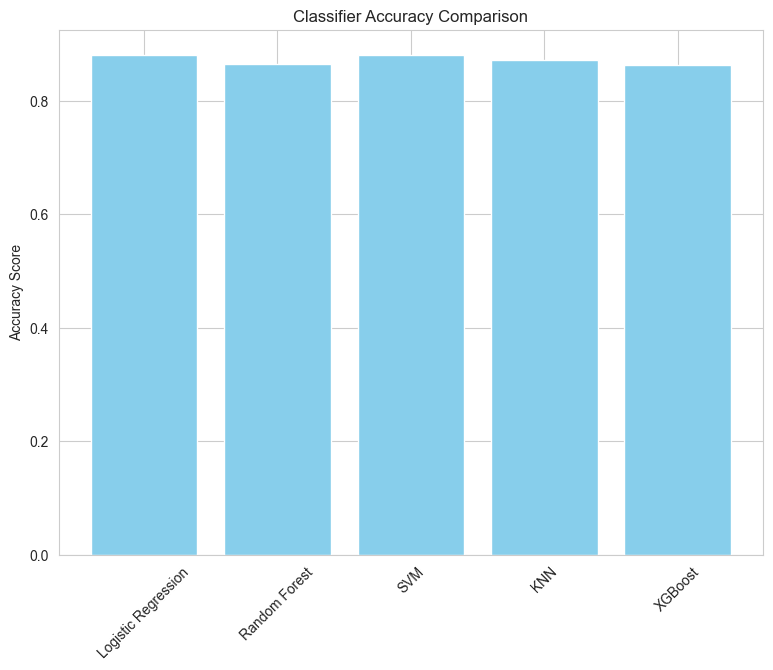

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

plt.style.use('default')  
# Set the seaborn style directly
sns.set_style("whitegrid")

fig = plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
accuracies = {}
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')

# Continue with the rest of your visualization code...

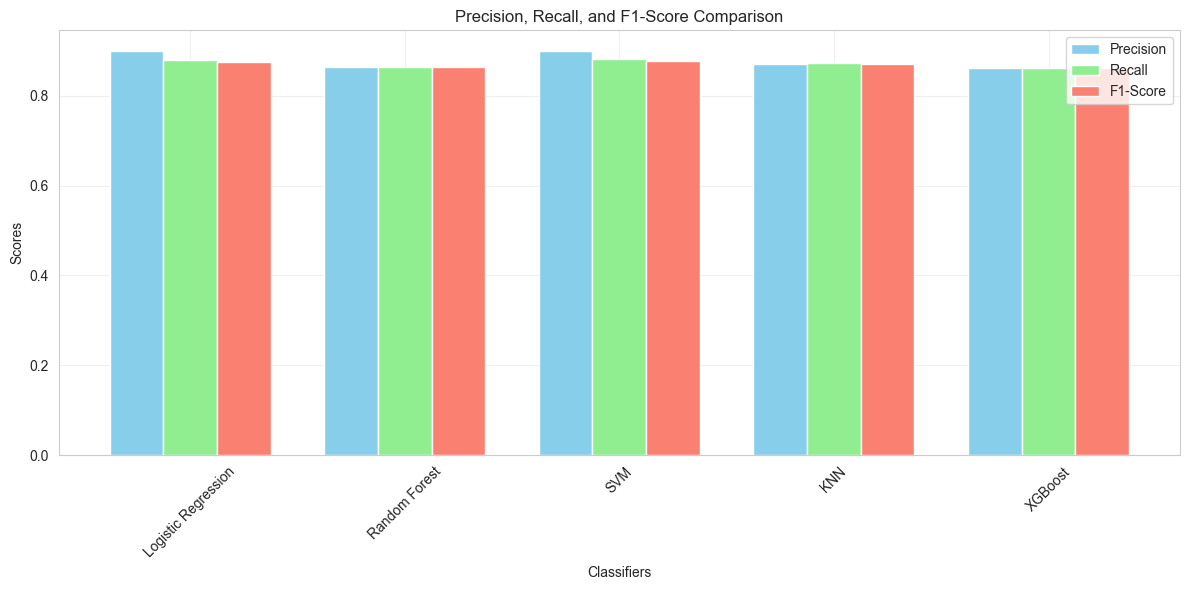

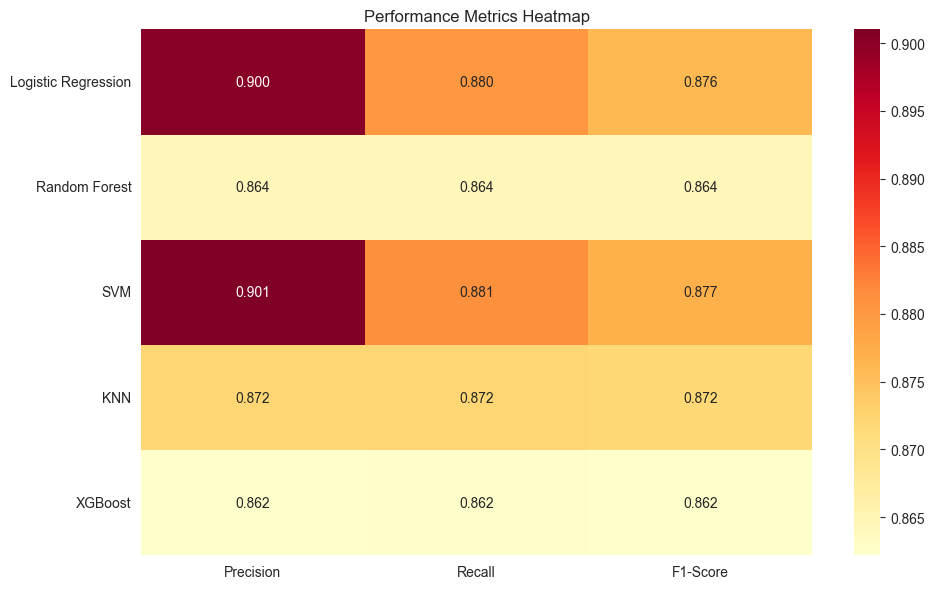


Detailed Performance Metrics:
--------------------------------------------------

Logistic Regression:
Precision: 0.9003
Recall: 0.8803
F1-Score: 0.8760
-------------------------

Random Forest:
Precision: 0.8643
Recall: 0.8644
F1-Score: 0.8644
-------------------------

SVM:
Precision: 0.9010
Recall: 0.8812
F1-Score: 0.8770
-------------------------

KNN:
Precision: 0.8721
Recall: 0.8723
F1-Score: 0.8720
-------------------------

XGBoost:
Precision: 0.8622
Recall: 0.8624
F1-Score: 0.8623
-------------------------


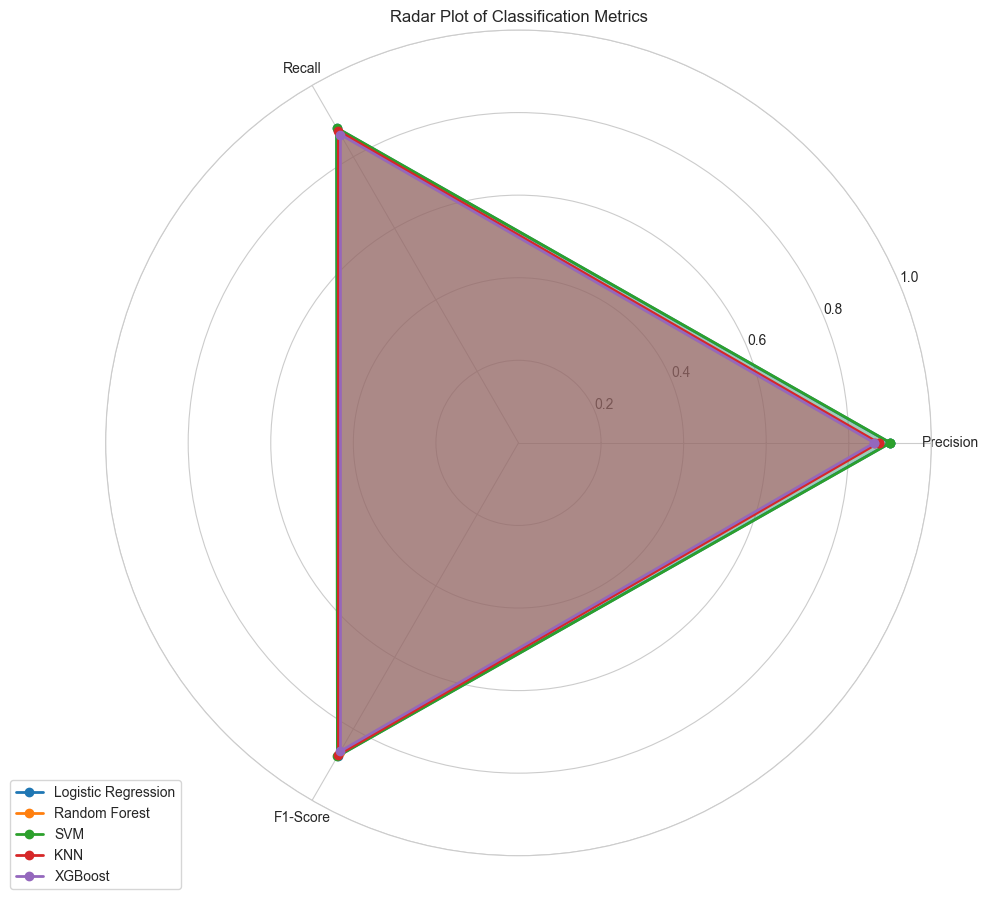

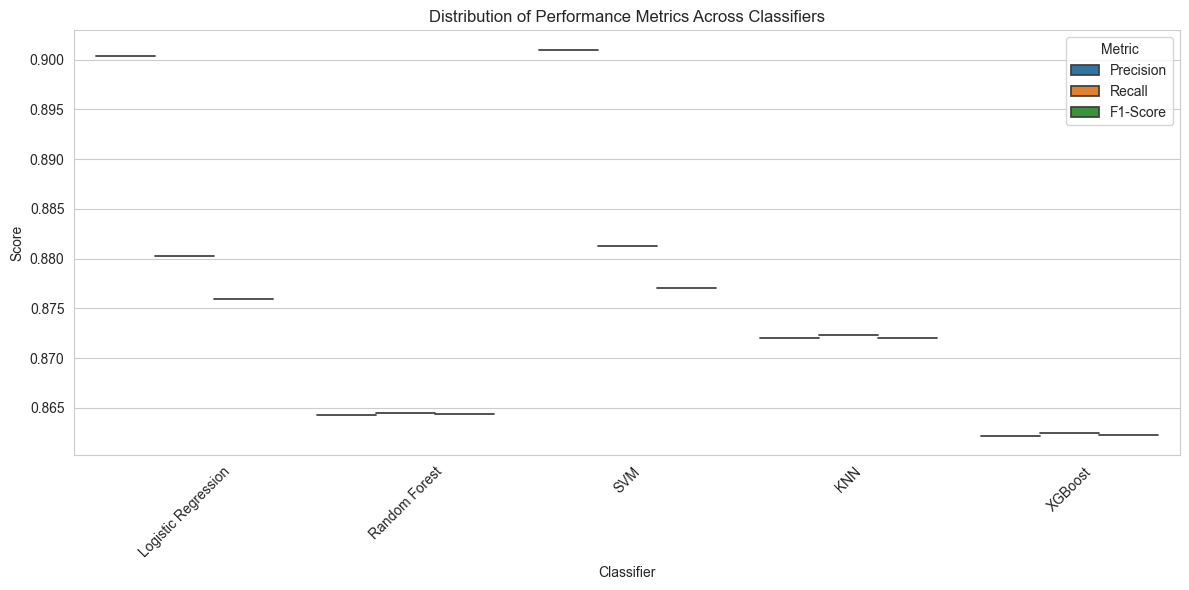

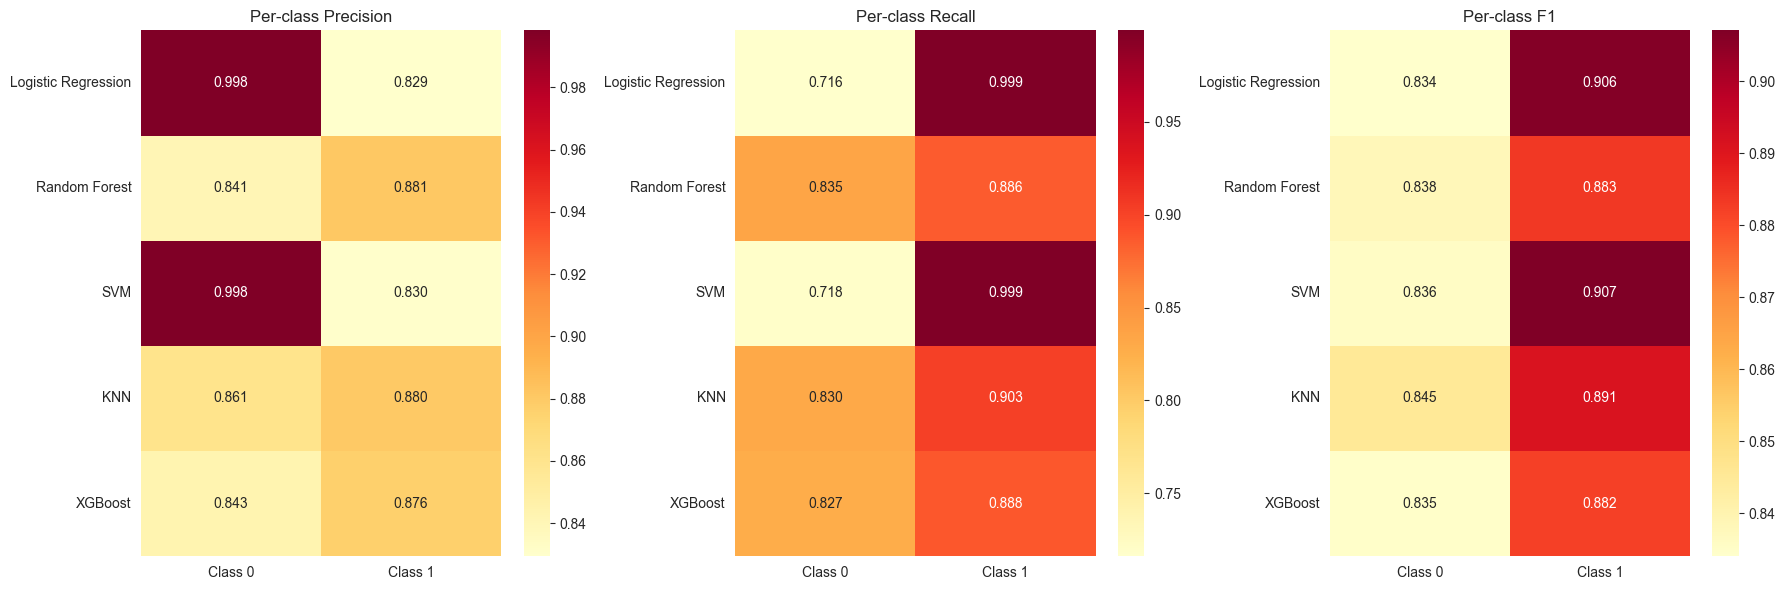

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Calculate metrics for each classifier
metrics = {
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

classifier_names = []

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))
    classifier_names.append(name)

# Create a bar plot
plt.figure(figsize=(12, 6))
x = np.arange(len(classifier_names))
width = 0.25

plt.bar(x - width, metrics['Precision'], width, label='Precision', color='skyblue')
plt.bar(x, metrics['Recall'], width, label='Recall', color='lightgreen')
plt.bar(x + width, metrics['F1-Score'], width, label='F1-Score', color='salmon')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.xticks(x, classifier_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a heatmap of the metrics
plt.figure(figsize=(10, 6))
metrics_df = pd.DataFrame(metrics, index=classifier_names)
sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Performance Metrics Heatmap')
plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nDetailed Performance Metrics:")
print("-" * 50)
for i, name in enumerate(classifier_names):
    print(f"\n{name}:")
    print(f"Precision: {metrics['Precision'][i]:.4f}")
    print(f"Recall: {metrics['Recall'][i]:.4f}")
    print(f"F1-Score: {metrics['F1-Score'][i]:.4f}")
    print("-" * 25)

# Create a radar plot
metrics_df = pd.DataFrame(metrics, index=classifier_names)

# Set up the angles for the radar plot
angles = np.linspace(0, 2*np.pi, len(metrics.keys()), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for idx, classifier in enumerate(classifier_names):
    values = metrics_df.loc[classifier].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=classifier)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics.keys())
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Plot of Classification Metrics')
plt.tight_layout()
plt.show()

# Create a violin plot for comparison
metrics_long = pd.DataFrame({
    'Metric': np.repeat(list(metrics.keys()), len(classifier_names)),
    'Classifier': np.tile(classifier_names, len(metrics)),
    'Score': np.concatenate([metrics['Precision'], metrics['Recall'], metrics['F1-Score']])
})

plt.figure(figsize=(12, 6))
sns.violinplot(data=metrics_long, x='Classifier', y='Score', hue='Metric')
plt.xticks(rotation=45)
plt.title('Distribution of Performance Metrics Across Classifiers')
plt.tight_layout()
plt.show()

# Calculate and plot per-class metrics
def get_per_class_metrics(y_true, y_pred):
    return {
        'precision': precision_score(y_true, y_pred, average=None),
        'recall': recall_score(y_true, y_pred, average=None),
        'f1': f1_score(y_true, y_pred, average=None)
    }

# Get per-class metrics for each classifier
per_class_metrics = {}
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    per_class_metrics[name] = get_per_class_metrics(y_test, y_pred)

# Plot per-class metrics
n_classes = len(np.unique(y_test))
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metric_names = ['precision', 'recall', 'f1']

for i, metric in enumerate(metric_names):
    data = []
    for name in classifier_names:
        data.append(per_class_metrics[name][metric])
    
    sns.heatmap(data, annot=True, fmt='.3f', cmap='YlOrRd', 
                xticklabels=[f'Class {i}' for i in range(n_classes)],
                yticklabels=classifier_names,
                ax=axes[i])
    axes[i].set_title(f'Per-class {metric.capitalize()}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os



# Create directory for saved models if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Train and save models
accuracies = {}
for name, clf in classifiers.items():
    # Train model
    clf.fit(X_train_scaled, y_train)
    
    # Save model
    model_path = f'saved_models/{name.replace(" ", "_").lower()}_model.joblib'
    joblib.dump(clf, model_path)
    print(f"Saved {name} model to {model_path}")
    
    # Evaluate model
    y_pred = clf.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {accuracies[name]:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Save scaler
scaler_path = 'saved_models/scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"Saved scaler to {scaler_path}")

# Save metadata
metadata = {
    'feature_names': list(X.columns),
    'models': list(classifiers.keys()),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_accuracies': accuracies
}

import json
with open('saved_models/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print("\nModel metadata saved to 'saved_models/model_metadata.json'")

# Define prediction functions
def predict_address(input_data, model_name='Random Forest'):
    """
    Make predictions on new data using the saved models.
    
    Parameters:
    -----------
    input_data : dict or pd.DataFrame
        The input data containing the features for prediction
    model_name : str
        The name of the model to use for prediction
        Options: 'Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'XGBoost'
    
    Returns:
    --------
    dict
        Containing prediction and probability (if available)
    """
    try:
        # Load the scaler
        scaler = joblib.load('saved_models/scaler.joblib')
        
        # Load the selected model
        model_path = f'saved_models/{model_name.replace(" ", "_").lower()}_model.joblib'
        model = joblib.load(model_path)
        
        # Convert input to DataFrame if it's a dictionary
        if isinstance(input_data, dict):
            input_data = pd.DataFrame([input_data])
        
        # Scale the features
        scaled_features = scaler.transform(input_data)
        
     
        prediction = model.predict(scaled_features)
        
       
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(scaled_features)
            confidence = np.max(probabilities, axis=1)[0]
        else:
            confidence = None
        
        result = {
            'prediction': int(prediction[0]),
            'confidence': float(confidence) if confidence is not None else None,
            'model_used': model_name
        }
        
        return result
    
    except Exception as e:
        return {'error': str(e)}

def ensemble_predict(input_data):
    """
    Make predictions using all models and return the majority vote.
    
    Parameters:
    -----------
    input_data : dict or pd.DataFrame
        The input data containing the features for prediction
    
    Returns:
    --------
    dict
        Containing ensemble prediction and individual model predictions
    """
    predictions = {}
    probabilities = {}
    
    # Get predictions from all models
    for name in classifiers.keys():
        result = predict_address(input_data, name)
        predictions[name] = result['prediction']
        probabilities[name] = result.get('confidence')
    
    # Calculate majority vote
    majority_vote = max(set(predictions.values()), key=list(predictions.values()).count)
    
    # Calculate average confidence (excluding None values)
    valid_probabilities = [p for p in probabilities.values() if p is not None]
    avg_confidence = sum(valid_probabilities) / len(valid_probabilities) if valid_probabilities else None
    
    return {
        'ensemble_prediction': majority_vote,
        'average_confidence': avg_confidence,
        'individual_predictions': predictions,
        'individual_probabilities': probabilities
    }

def compare_models(input_data):
    """
    Compare predictions and confidence scores from all models.
    
    Parameters:
    -----------
    input_data : dict or pd.DataFrame
        The input data containing the features for prediction
    
    Returns:
    --------
    pd.DataFrame
        Comparison of all model predictions and confidence scores
    """
    results = []
    
    for name in classifiers.keys():
        result = predict_address(input_data, name)
        results.append({
            'Model': name,
            'Prediction': result['prediction'],
            'Confidence': result.get('confidence')
        })
    
    return pd.DataFrame(results)

Saved Logistic Regression model to saved_models/logistic_regression_model.joblib

Logistic Regression - Accuracy: 0.8803
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83       849
           1       0.83      1.00      0.91      1172

    accuracy                           0.88      2021
   macro avg       0.91      0.86      0.87      2021
weighted avg       0.90      0.88      0.88      2021

Confusion Matrix for Logistic Regression:
[[ 608  241]
 [   1 1171]]
--------------------------------------------------
Saved Random Forest model to saved_models/random_forest_model.joblib

Random Forest - Accuracy: 0.8644
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       849
           1       0.88      0.89      0.88      1172

    accuracy                           0.86      2021
   macro avg       0.86

In [47]:
import os
from pathlib import Path

# Define the path to save models in the Flask backend
BACKEND_PATH = Path('App_backend/app/saved_models')

# Create the directory if it doesn't exist
os.makedirs(BACKEND_PATH, exist_ok=True)

# Save models
for name, clf in classifiers.items():
    # Save model
    model_path = BACKEND_PATH / f'{name.replace(" ", "_").lower()}_model.joblib'
    joblib.dump(clf, model_path)
    print(f"Saved {name} model to {model_path}")
    
    # Evaluate model
    y_pred = clf.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {accuracies[name]:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Save scaler
scaler_path = BACKEND_PATH / 'scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"Saved scaler to {scaler_path}")

# Save metadata
metadata = {
    'feature_names': list(X.columns),
    'models': list(classifiers.keys()),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_accuracies': accuracies
}

with open(BACKEND_PATH / 'model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"\nModel metadata saved to {BACKEND_PATH / 'model_metadata.json'}")

Saved Logistic Regression model to App_backend\app\saved_models\logistic_regression_model.joblib

Logistic Regression - Accuracy: 0.8803
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83       849
           1       0.83      1.00      0.91      1172

    accuracy                           0.88      2021
   macro avg       0.91      0.86      0.87      2021
weighted avg       0.90      0.88      0.88      2021

Confusion Matrix for Logistic Regression:
[[ 608  241]
 [   1 1171]]
--------------------------------------------------
Saved Random Forest model to App_backend\app\saved_models\random_forest_model.joblib

Random Forest - Accuracy: 0.8644
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       849
           1       0.88      0.89      0.88      1172

    accuracy                           0.86  

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
from pathlib import Path

# Define the path to save models in the Flask backend
BACKEND_PATH = Path('App_backend/app/saved_models')
os.makedirs(BACKEND_PATH, exist_ok=True)

def prepare_features(data):
    """
    Prepare features for address validation model
    """
    features = pd.DataFrame()
    
    # Geographic features
    features['latitude'] = data['latitude']
    features['longitude'] = data['longitude']
    features['abs_latitude'] = abs(data['latitude'])
    features['distance_from_equator'] = abs(data['latitude'])
    features['hemisphere'] = (data['latitude'] >= 0).astype(int)
    
    # Location matching features
    features['valid_coords'] = (~data[['latitude', 'longitude']].isna()).all(axis=1).astype(int)
    features['country_match'] = data['country_match'].astype(int)
    features['city_state_match'] = data['city_state_match'].astype(int)
    
    # Encode categorical variables
    le = LabelEncoder()
    features['state_encoded'] = le.fit_transform(data['state'])
    features['country_encoded'] = le.fit_transform(data['country'])
    
    return features

# Load and prepare your training data
# Note: You'll need to replace this with your actual training data
# The data should have columns: latitude, longitude, country, state, city_state_match, country_match, valid_address (target)

# Train models
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and save models
accuracies = {}
for name, clf in classifiers.items():
    # Train model
    clf.fit(X_train_scaled, y_train)
    
    # Save model
    model_path = BACKEND_PATH / f'{name.replace(" ", "_").lower()}_model.joblib'
    joblib.dump(clf, model_path)
    print(f"Saved {name} model to {model_path}")
    
    # Evaluate model
    y_pred = clf.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {accuracies[name]:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Save scaler
scaler_path = BACKEND_PATH / 'scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"Saved scaler to {scaler_path}")

# Save feature names and other metadata
metadata = {
    'feature_names': [
        'latitude',
        'longitude',
        'abs_latitude',
        'distance_from_equator',
        'hemisphere',
        'valid_coords',
        'country_match',
        'city_state_match',
        'state_encoded',
        'country_encoded'
    ],
    'models': list(classifiers.keys()),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_accuracies': accuracies
}

with open(BACKEND_PATH / 'model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"\nModel metadata saved to {BACKEND_PATH / 'model_metadata.json'}")

Saved Logistic Regression model to App_backend\app\saved_models\logistic_regression_model.joblib

Logistic Regression - Accuracy: 0.8803
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83       849
           1       0.83      1.00      0.91      1172

    accuracy                           0.88      2021
   macro avg       0.91      0.86      0.87      2021
weighted avg       0.90      0.88      0.88      2021

Confusion Matrix for Logistic Regression:
[[ 608  241]
 [   1 1171]]
--------------------------------------------------
Saved Random Forest model to App_backend\app\saved_models\random_forest_model.joblib

Random Forest - Accuracy: 0.8679
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       849
           1       0.88      0.89      0.89      1172

    accuracy                           0.87  